# Loading Data from CSV file

* The Pandas library in Python provides excellent, built-in support for time series data.
* Pandas represents time series datasets as a **Series**. 
* A Series is a one-dimensional array with a time label for each row.
* A Dataframe is a collection of series

In [2]:
import pandas as pd
import numpy as np

In [2]:
# Download csv file from resources and put it in working directory
dataframe = pd.read_csv('daily-total-female-births-CA.csv', header=0)

#### First five records

In [3]:
dataframe.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


#### Data Type

In [4]:
dataframe['date'].dtype

dtype('O')

### Loading data with parse_dates

In [2]:
df2 = pd.read_csv('daily-total-female-births-CA.csv', header=0 , parse_dates=[0])

#### First five records

In [6]:
df2.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


#### Data Type

In [7]:
df2['date'].dtype

dtype('<M8[ns]')

#### Note
dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

df = pd.read_csv(.........,parse_dates=[0], date_parser=dateparse)

https://docs.python.org/2/library/datetime.html#strftime-and-strptime-behavior

### Loading Data as a series

In [8]:
series = pd.read_csv('daily-total-female-births-CA.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)

#### First 5 records

In [9]:
series.head()

date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
Name: births, dtype: int64

# Exploring Time Series Data

#### Size

In [10]:
series.shape

(365,)

In [11]:
df2.shape

(365, 2)

### Querying by time

In [12]:
print(series['1959-01'])

date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
1959-01-06    29
1959-01-07    45
1959-01-08    43
1959-01-09    38
1959-01-10    27
1959-01-11    38
1959-01-12    33
1959-01-13    55
1959-01-14    47
1959-01-15    45
1959-01-16    37
1959-01-17    50
1959-01-18    43
1959-01-19    41
1959-01-20    52
1959-01-21    34
1959-01-22    53
1959-01-23    39
1959-01-24    32
1959-01-25    37
1959-01-26    43
1959-01-27    39
1959-01-28    35
1959-01-29    44
1959-01-30    38
1959-01-31    24
Name: births, dtype: int64


In [13]:
df2[(df2['date'] > '1959-01-01') & (df2['date'] <= '1959-01-21')]

,date,births
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44
5,1959-01-06,29
6,1959-01-07,45
7,1959-01-08,43
8,1959-01-09,38
9,1959-01-10,27
10,1959-01-11,38


### Descriptive Statistics

In [14]:
series.describe()

count    365.000000
mean      41.980822
std        7.348257
min       23.000000
25%       37.000000
50%       42.000000
75%       46.000000
max       73.000000
Name: births, dtype: float64

In [15]:
df2.describe()

,births
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


# Feature Engineering

* Date time features
* Lag features
* Window features
* Expanding feature


### Date time features

In [16]:
df2.head(5)

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [17]:
features = df2.copy()

In [18]:
features['year'] = df2['date'].dt.year

In [19]:
features['month'] = df2['date'].dt.month

In [20]:
features['day'] = df2['date'].dt.day

In [21]:
features.head(5)

,date,births,year,month,day
0,1959-01-01,35,1959,1,1
1,1959-01-02,32,1959,1,2
2,1959-01-03,30,1959,1,3
3,1959-01-04,31,1959,1,4
4,1959-01-05,44,1959,1,5


For more detail : https://pandas.pydata.org/pandas-docs/stable//reference/series.html#datetimelike-properties

### Lag features

To create lag1 feature

In [19]:
features['lag2'] =  df2['births'].shift(2)

In [23]:
features['lag2'] =  df2['births'].shift(365)

In [20]:
features.head(7)

,date,births,lag1,lag2
0,1959-01-01,35,NaN,NaN
1,1959-01-02,32,35.0,NaN
2,1959-01-03,30,32.0,35.0
3,1959-01-04,31,30.0,32.0
4,1959-01-05,44,31.0,30.0
5,1959-01-06,29,44.0,31.0
6,1959-01-07,45,29.0,44.0


For more detail : https://pandas.pydata.org/pandas-docs/stable//reference/api/pandas.Series.shift.html#pandas.Series.shift

### Window features

In [25]:
features['Roll_mean'] = df2['births'].rolling(window = 2).mean()

In [26]:
features.head(5)

,date,births,year,month,day,lag1,lag2,Roll_mean
0,1959-01-01,35,1959,1,1,NaN,NaN,NaN
1,1959-01-02,32,1959,1,2,35.0,NaN,33.5
2,1959-01-03,30,1959,1,3,32.0,NaN,31.0
3,1959-01-04,31,1959,1,4,30.0,NaN,30.5
4,1959-01-05,44,1959,1,5,31.0,NaN,37.5


In [27]:
features['Roll_max'] = df2['births'].rolling(window = 3).max()

In [28]:
features.head(5)

,date,births,year,month,day,lag1,lag2,Roll_mean,Roll_max
0,1959-01-01,35,1959,1,1,NaN,NaN,NaN,NaN
1,1959-01-02,32,1959,1,2,35.0,NaN,33.5,NaN
2,1959-01-03,30,1959,1,3,32.0,NaN,31.0,35.0
3,1959-01-04,31,1959,1,4,30.0,NaN,30.5,32.0
4,1959-01-05,44,1959,1,5,31.0,NaN,37.5,44.0


For more detail : https://pandas.pydata.org/pandas-docs/stable//reference/api/pandas.Series.rolling.html#pandas.Series.rolling

### Expanding features

In [29]:
features['Expand_max'] = df2['births'].expanding().max()

In [30]:
features.head(10)

,date,births,year,month,day,lag1,lag2,Roll_mean,Roll_max,Expand_max
0,1959-01-01,35,1959,1,1,NaN,NaN,NaN,NaN,35.0
1,1959-01-02,32,1959,1,2,35.0,NaN,33.5,NaN,35.0
2,1959-01-03,30,1959,1,3,32.0,NaN,31.0,35.0,35.0
3,1959-01-04,31,1959,1,4,30.0,NaN,30.5,32.0,35.0
4,1959-01-05,44,1959,1,5,31.0,NaN,37.5,44.0,44.0
5,1959-01-06,29,1959,1,6,44.0,NaN,36.5,44.0,44.0
6,1959-01-07,45,1959,1,7,29.0,NaN,37.0,45.0,45.0
7,1959-01-08,43,1959,1,8,45.0,NaN,44.0,45.0,45.0
8,1959-01-09,38,1959,1,9,43.0,NaN,40.5,45.0,45.0
9,1959-01-10,27,1959,1,10,38.0,NaN,32.5,43.0,45.0


For more detail : https://pandas.pydata.org/pandas-docs/stable//reference/api/pandas.Series.expanding.html#pandas.Series.expanding

# Time Series - Data Visualization

In [31]:
from matplotlib import pyplot as plt
%matplotlib inline

In [32]:
Dataviz_df = df2.copy()

In [33]:
Dataviz_df.head(10)

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44
5,1959-01-06,29
6,1959-01-07,45
7,1959-01-08,43
8,1959-01-09,38
9,1959-01-10,27


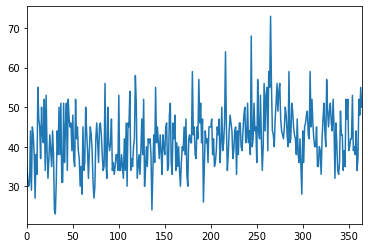

In [34]:
Dataviz_df['births'].plot()

In [35]:
Dataviz_df.index = Dataviz_df['date'] 

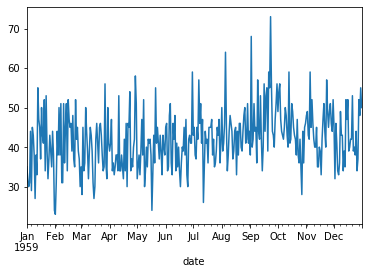

In [36]:
Dataviz_df['births'].plot()

### Zooming In

In [37]:
Dataviz_df2 = Dataviz_df[(Dataviz_df['date'] > '1959-01-01') & (Dataviz_df['date'] <= '1959-01-10')].copy()

In [38]:
Dataviz_df2

,date,births
date,,
1959-01-02,1959-01-02,32
1959-01-03,1959-01-03,30
1959-01-04,1959-01-04,31
1959-01-05,1959-01-05,44
1959-01-06,1959-01-06,29
1959-01-07,1959-01-07,45
1959-01-08,1959-01-08,43
1959-01-09,1959-01-09,38
1959-01-10,1959-01-10,27


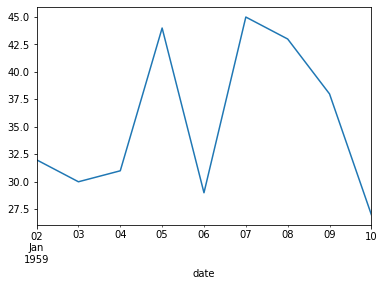

In [39]:
Dataviz_df2['births'].plot()

### Trendline

In [40]:
import seaborn as sns

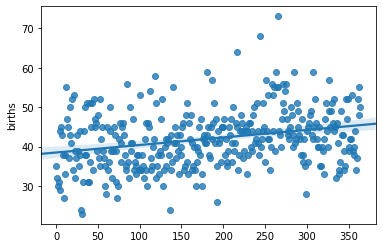

In [41]:
sns.regplot(x= df2.index.values, y=df2['births'])

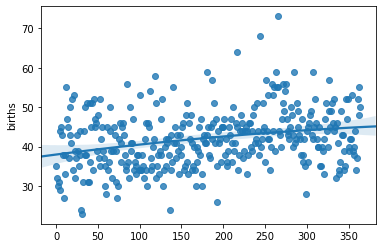

In [42]:
sns.regplot(x= df2.index.values, y=df2['births'], order =2)

In [43]:
miles_df = pd.read_csv('us-airlines-monthly-aircraft-miles-flown.csv', header=0 , parse_dates=[0])

In [44]:
miles_df.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


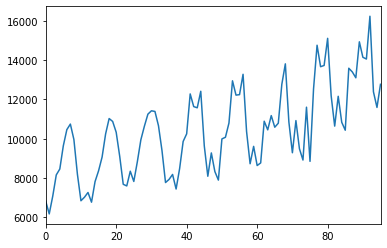

In [45]:
miles_df['MilesMM'].plot()

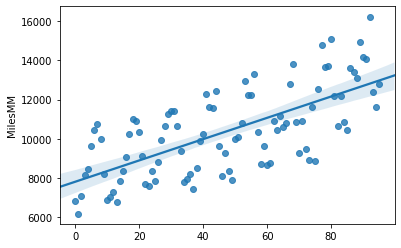

In [46]:
sns.regplot(x= miles_df.index.values, y=miles_df['MilesMM'])

### Removing Seasonality

In [47]:
miles_df['year'] = miles_df['Month'].dt.year

In [48]:
miles_df.head()

,Month,MilesMM,year
0,1963-01-01,6827,1963
1,1963-02-01,6178,1963
2,1963-03-01,7084,1963
3,1963-04-01,8162,1963
4,1963-05-01,8462,1963


In [49]:
miles_df.groupby('year')['MilesMM'].mean()

year
1963     8300.250000
1964     8849.333333
1965     9619.250000
1966     9929.500000
1967    10542.916667
1968    10747.916667
1969    11972.000000
1970    13124.750000
Name: MilesMM, dtype: float64

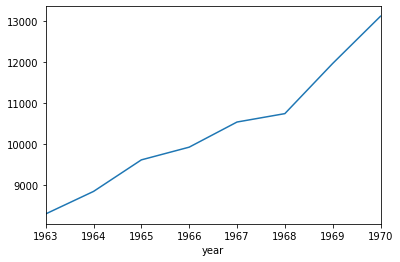

In [50]:
miles_df.groupby('year')['MilesMM'].mean().plot()

### Creating Lag plots

In [51]:
miles_df['lag1'] =  miles_df['MilesMM'].shift(1)

In [52]:
miles_df.head()

,Month,MilesMM,year,lag1
0,1963-01-01,6827,1963,NaN
1,1963-02-01,6178,1963,6827.0
2,1963-03-01,7084,1963,6178.0
3,1963-04-01,8162,1963,7084.0
4,1963-05-01,8462,1963,8162.0


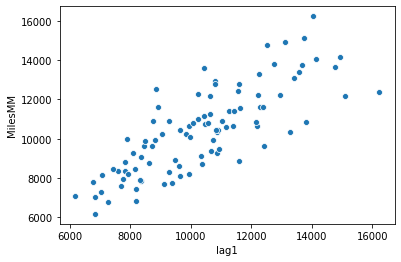

In [53]:
sns.scatterplot(x=miles_df['lag1'], y=miles_df['MilesMM'])

In [54]:
from pandas.plotting import lag_plot

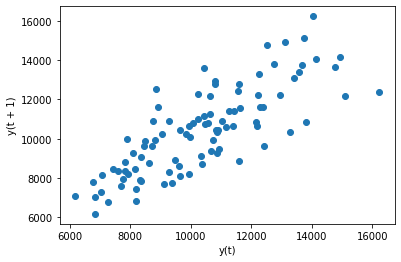

In [55]:
lag_plot(miles_df['MilesMM'])

### Autocorrelation Plots

In [56]:
from pandas.plotting import autocorrelation_plot

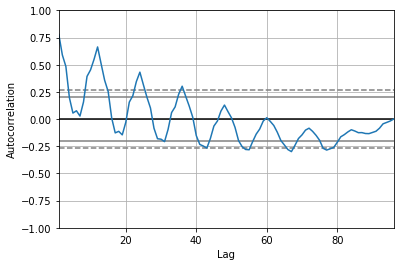

In [57]:
autocorrelation_plot(miles_df['MilesMM'])

## Downsampling and Upsampling

In [517]:
miles_df = pd.read_csv('us-airlines-monthly-aircraft-miles-flown.csv', header=0 , parse_dates=[0])

In [518]:
miles_df.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


### Downsampling

In [519]:
quarterly_miles_df = miles_df.resample('Q', on='Month').mean()

In [520]:
quarterly_miles_df.head()

,MilesMM
Month,
1963-03-31,6696.333333
1963-06-30,8756.000000
1963-09-30,10392.333333
1963-12-31,7356.333333
1964-03-31,7287.666667


In [521]:
yearly_total_miles_df = miles_df.resample('A', on='Month').sum()

In [522]:
yearly_total_miles_df.head()

,MilesMM
Month,
1963-12-31,99603
1964-12-31,106192
1965-12-31,115431
1966-12-31,119154
1967-12-31,126515


| Alias  | Description           |
|--------|-----------------------|
| B      | Business day          |
| D      | Calendar day          |
| W      | Weekly                |
| M      | Month end             |
| Q      | Quarter end           |
| A      | Year end              |
| BA     | Business year end     |
| AS     | Year start            |
| H      | Hourly frequency      |
| T, min | Minutely frequency    |
| S      | Secondly frequency    |
| L, ms  | Millisecond frequency |
| U, us  | Microsecond frequency |
| N, ns  | Nanosecond frequency  |

### Upsampling

In [523]:
upsampled_miles_df = miles_df.resample('D', on='Month').mean()

In [524]:
upsampled_miles_df.head(35)

,MilesMM
Month,
1963-01-01,6827.0
1963-01-02,NaN
1963-01-03,NaN
1963-01-04,NaN
1963-01-05,NaN
1963-01-06,NaN
1963-01-07,NaN
1963-01-08,NaN
1963-01-09,NaN


In [525]:
interpolated_miles_df = upsampled_miles_df.interpolate(method='linear')

In [526]:
interpolated_miles_df.head(32)

,MilesMM
Month,
1963-01-01,6827.000000
1963-01-02,6806.064516
1963-01-03,6785.129032
1963-01-04,6764.193548
1963-01-05,6743.258065
1963-01-06,6722.322581
1963-01-07,6701.387097
1963-01-08,6680.451613
1963-01-09,6659.516129


In [527]:
interpolated_miles_df.head(35)

,MilesMM
Month,
1963-01-01,6827.000000
1963-01-02,6806.064516
1963-01-03,6785.129032
1963-01-04,6764.193548
1963-01-05,6743.258065
1963-01-06,6722.322581
1963-01-07,6701.387097
1963-01-08,6680.451613
1963-01-09,6659.516129


<AxesSubplot:xlabel='Month'>

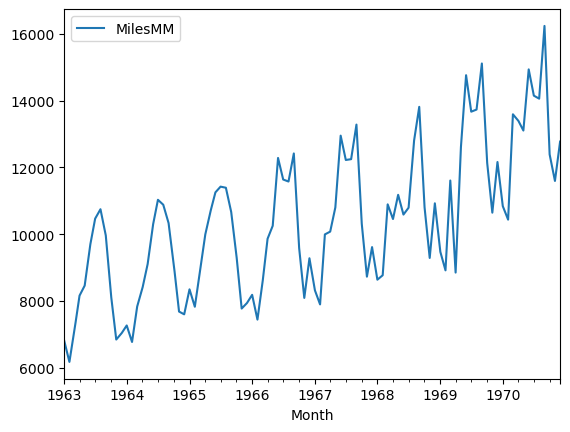

In [528]:
interpolated_miles_df.plot()

In [529]:
poly_interpolated_miles_df = upsampled_miles_df.interpolate(method='spline', order=2)

<AxesSubplot:xlabel='Month'>

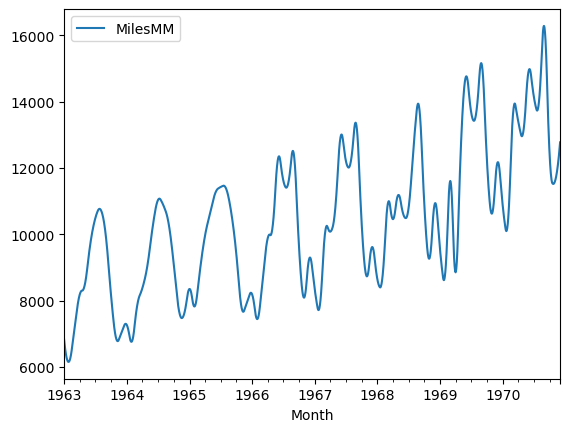

In [530]:
poly_interpolated_miles_df.plot()

| Method  | Description                                               |
|---------|-----------------------------------------------------------|
| bfill   | Backward fill                                             |
| count   | Count of values                                           |
| ffill   | Forward fill                                              |
| first   | First valid data value                                    |
| last    | Last valid data value                                     |
| max     | Maximum data value                                        |
| mean    | Mean of values in time range                              |
| median  | Median of values in time range                            |
| min     | Minimum data value                                        |
| nunique | Number of unique values                                   |
| ohlc    | Opening value, highest value, lowest value, closing value |
| pad     | Same as forward fill                                      |
| std     | Standard deviation of values                              |
| sum     | Sum of values                                             |
| var     | Variance of values                                        |

## Decomposing Time Series

**Additive Model** 

y(t) = Level + Trend + Seasonality + Noise

**Multiplicative Model** 

y(t) = Level * Trend * Seasonality * Noise

In [688]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [689]:
miles_decomp_df = pd.read_csv('us-airlines-monthly-aircraft-miles-flown.csv', header=0 , parse_dates=[0])

In [690]:
miles_decomp_df.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


In [691]:
miles_decomp_df.index = miles_decomp_df['Month'] 

In [692]:
result = seasonal_decompose(miles_decomp_df['MilesMM'], model='additive')

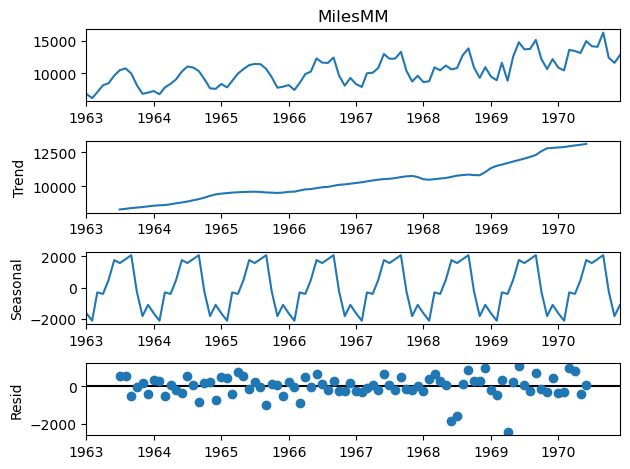

In [694]:
result.plot();

In [695]:
result2 = seasonal_decompose(miles_decomp_df['MilesMM'], model='multiplicative')

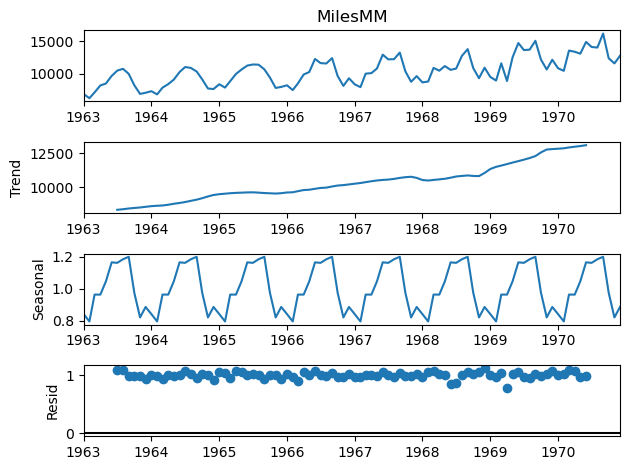

In [697]:
result2.plot();

### Differencing

In [698]:
miles_df = pd.read_csv('us-airlines-monthly-aircraft-miles-flown.csv', header=0 , parse_dates=[0])

In [699]:
miles_df.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


In [700]:
miles_df['lag1'] =  miles_df['MilesMM'].shift(1)

In [701]:
miles_df['MilesMM_diff_1'] = miles_df['MilesMM'].diff(periods=1)

In [702]:
miles_df.head()

,Month,MilesMM,lag1,MilesMM_diff_1
0,1963-01-01,6827,NaN,NaN
1,1963-02-01,6178,6827.0,-649.0
2,1963-03-01,7084,6178.0,906.0
3,1963-04-01,8162,7084.0,1078.0
4,1963-05-01,8462,8162.0,300.0


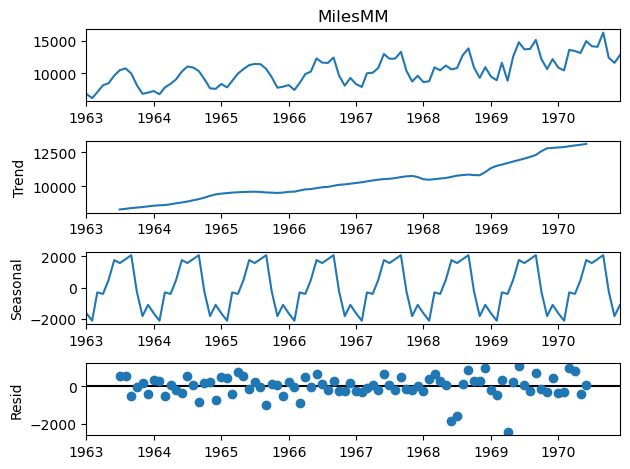

In [705]:
miles_df.index = miles_df['Month'] 
result_a = seasonal_decompose(miles_df['MilesMM'], model='additive')
result_a.plot();

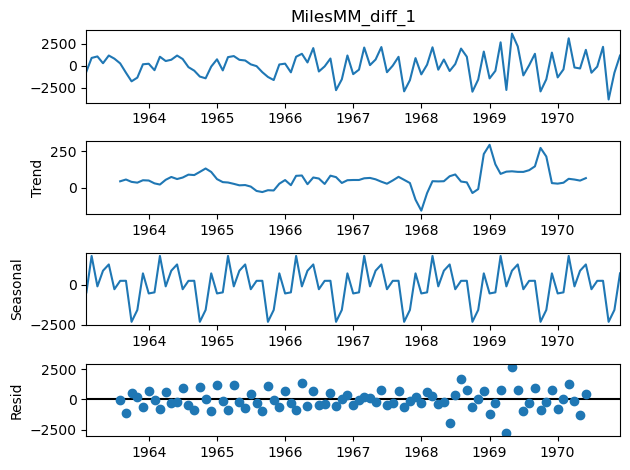

In [706]:
miles_df.index = miles_df['Month'] 
result_b = seasonal_decompose(miles_df.iloc[1:,3], model='additive')
result_b.plot();

<AxesSubplot:xlabel='Month'>

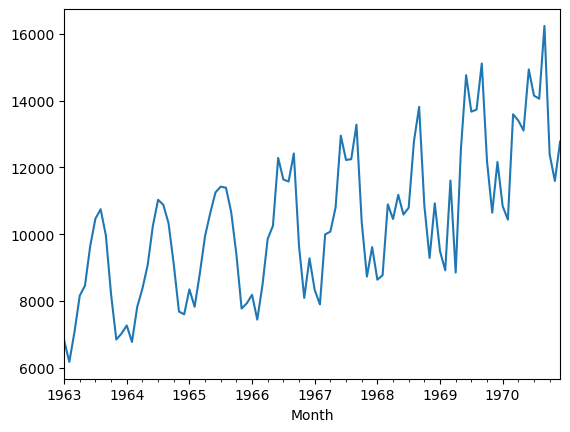

In [707]:
miles_df['MilesMM'].plot()

<AxesSubplot:xlabel='Month'>

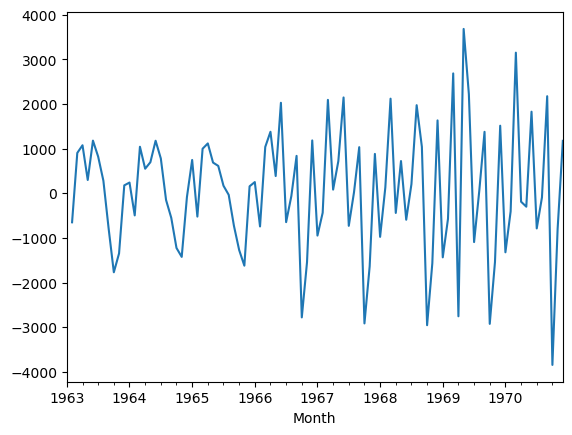

In [708]:
miles_df['MilesMM_diff_1'].plot() 

In [709]:
miles_df['MilesMM_diff_12'] = miles_df['MilesMM_diff_1'].diff(periods=12)

<AxesSubplot:xlabel='Month'>

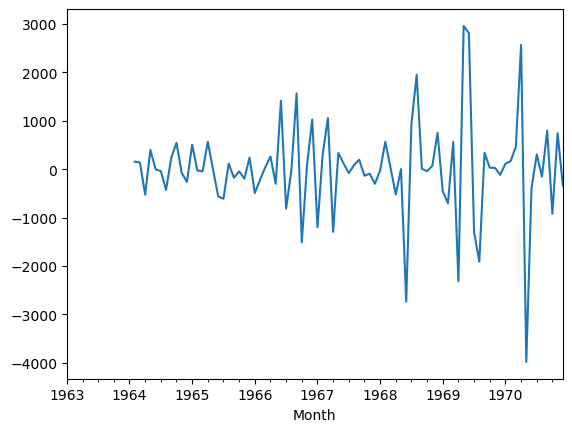

In [710]:
miles_df['MilesMM_diff_12'].plot() 

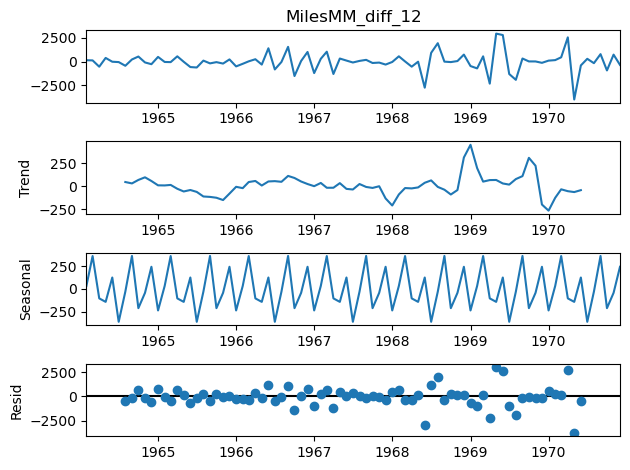

In [712]:
result_c = seasonal_decompose(miles_df.iloc[13:,4], model='additive')
result_c.plot();

In [ ]:
miles_df.head(50)

## Test-Train Split

In [372]:
temp_df = pd.read_csv('daily-min-temperatures.csv', header=0 , parse_dates=[0])

In [373]:
temp_df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [374]:
temp_df.tail()

,Date,Temp
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7
3649,1990-12-31,13.0


In [375]:
temp_df.shape

(3650, 2)

In [376]:
temp_df.shape[0]

3650

In [377]:
train_size = int(temp_df.shape[0]*0.8)
train_size

2920

In [378]:
train =  temp_df[0:train_size]

In [379]:
test =  temp_df[train_size:]

In [380]:
train.shape

(2920, 2)

In [381]:
test.shape

(730, 2)

### Autoregression Model

In [ ]:
#step1=remove trend,seasonlity
#using lag create model
#forcast

In [715]:
df = pd.read_csv('daily-min-temperatures.csv', header=0 , parse_dates=[0])

In [716]:
df

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
...,...,...
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7


In [717]:
df.Temp.count()

3650

In [718]:
df.Temp[1:3643]




1       17.9
2       18.8
3       14.6
4       15.8
5       15.8
        ... 
3638    15.4
3639    13.1
3640    13.2
3641    13.9
3642    10.0
Name: Temp, Length: 3642, dtype: float64

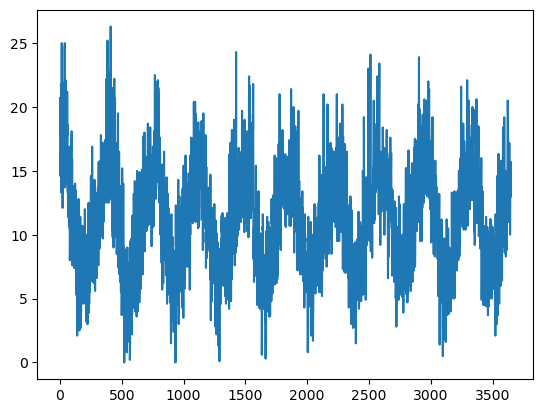

In [719]:
plt.plot(df['Temp'])

In [720]:
#Ho: It is non stationary
#H1: It is stationary
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

In [721]:
adf_test(df['Temp'])

1. ADF :  -4.4448049246117005
2. P-Value :  0.0002470826300360988
3. Num Of Lags :  20
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 3629
5. Critical Values :
	 1% :  -3.4321532327220154
	 5% :  -2.862336767636517
	 10% :  -2.56719413172842


In [722]:
train, test = df.Temp[1:3643], df.Temp[3643:]

In [723]:
train

1       17.9
2       18.8
3       14.6
4       15.8
5       15.8
        ... 
3638    15.4
3639    13.1
3640    13.2
3641    13.9
3642    10.0
Name: Temp, Length: 3642, dtype: float64

In [724]:
test

3643    12.9
3644    14.6
3645    14.0
3646    13.6
3647    13.5
3648    15.7
3649    13.0
Name: Temp, dtype: float64

In [725]:
from statsmodels.tsa.ar_model import AutoReg as AR

In [726]:
model = AR(train,lags=30)
model_fit = model.fit()

#### Coef of lag variables

In [727]:
model_fit.params

const       0.556430
Temp.L1     0.588555
Temp.L2    -0.090839
Temp.L3     0.048253
Temp.L4     0.040129
Temp.L5     0.039351
Temp.L6     0.025909
Temp.L7     0.044663
Temp.L8     0.012769
Temp.L9     0.037227
Temp.L10   -0.000636
Temp.L11    0.004690
Temp.L12    0.018399
Temp.L13    0.027153
Temp.L14    0.000539
Temp.L15    0.024790
Temp.L16    0.007606
Temp.L17    0.009952
Temp.L18    0.034161
Temp.L19   -0.009247
Temp.L20    0.024199
Temp.L21    0.018826
Temp.L22    0.012317
Temp.L23   -0.018604
Temp.L24   -0.001784
Temp.L25    0.016712
Temp.L26    0.019785
Temp.L27    0.009730
Temp.L28    0.006316
Temp.L29   -0.001286
Temp.L30   -0.000179
dtype: float64

In [728]:
predictions = model_fit.predict(start=3642,end=3649)

In [729]:
len(train)

3642

In [730]:
predictions.dropna(inplace=True)

In [731]:
predictions=predictions.dropna()

In [732]:
predictions

3643    13.052959
3644    13.532909
3645    13.244517
3646    13.091894
3647    13.147498
3648    13.177283
3649    13.377456
dtype: float64

In [733]:
test_y

3643    12.9
3644    14.6
3645    14.0
3646    13.6
3647    13.5
3648    15.7
3649    13.0
Name: Temp, dtype: float64

In [734]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_y, predictions)
mse

1.2316912677342386

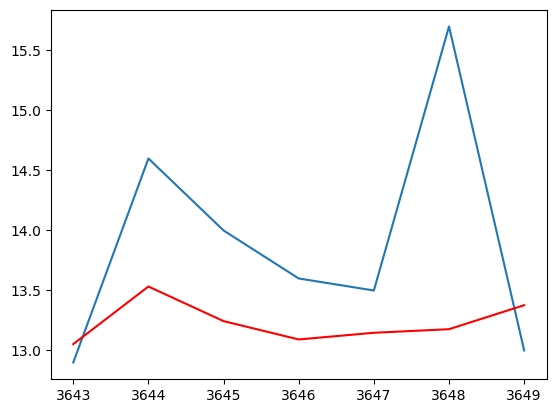

In [735]:
pyplot.plot(test_y)
pyplot.plot(predictions, color='red')

### Moving Average Model

In [ ]:
#step1-build model using AR
#step2-find residuals
#step 3-build forcast model on residuals 
#step 4-use forcsted residuals to update previous residuals 

In [736]:
df = pd.read_csv('daily-min-temperatures.csv', header=0 , parse_dates=[0])

In [737]:
df

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
...,...,...
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7


In [738]:
df['t'] =  df['Temp'].shift(1)

In [739]:
df['Resid'] = df['Temp'] - df['t']

In [740]:
df.head()

,Date,Temp,t,Resid
0,1981-01-01,20.7,NaN,NaN
1,1981-01-02,17.9,20.7,-2.8
2,1981-01-03,18.8,17.9,0.9
3,1981-01-04,14.6,18.8,-4.2
4,1981-01-05,15.8,14.6,1.2


In [741]:
df['Resid']

0       NaN
1      -2.8
2       0.9
3      -4.2
4       1.2
       ... 
3645   -0.6
3646   -0.4
3647   -0.1
3648    2.2
3649   -2.7
Name: Resid, Length: 3650, dtype: float64

In [742]:
train, test = df.Resid[1:df.shape[0]-7], df.Resid[df.shape[0]-7:]

In [743]:
df.shape[0]

3650

In [744]:
df.Resid[1:df.shape[0]-7]

1      -2.8
2       0.9
3      -4.2
4       1.2
5       0.0
       ... 
3638    0.7
3639   -2.3
3640    0.1
3641    0.7
3642   -3.9
Name: Resid, Length: 3642, dtype: float64

In [745]:
 df.Resid[df.shape[0]-7:]

3643    2.9
3644    1.7
3645   -0.6
3646   -0.4
3647   -0.1
3648    2.2
3649   -2.7
Name: Resid, dtype: float64

In [746]:
train.head()

1   -2.8
2    0.9
3   -4.2
4    1.2
5    0.0
Name: Resid, dtype: float64

In [747]:
from statsmodels.tsa.ar_model import AutoReg as AR

In [748]:
model = AR(train,lags=5)
model_fit = model.fit()

In [749]:
model_fit.ar_lags

[1, 2, 3, 4, 5]

In [750]:
model_fit.params

const      -0.002749
Resid.L1   -0.335320
Resid.L2   -0.391591
Resid.L3   -0.294061
Resid.L4   -0.207887
Resid.L5   -0.136161
dtype: float64

In [754]:
len(test)

7

In [751]:
pred_resid = model_fit.predict(start=len(train), end=len(train)+len(test))

In [755]:
pred_resid.dropna(inplace=True)

In [756]:
df.t[df.shape[0]-7:]

3643    10.0
3644    12.9
3645    14.6
3646    14.0
3647    13.6
3648    13.5
3649    15.7
Name: t, dtype: float64

In [757]:
predictions = df.t[df.shape[0]-7:] + pred_resid

In [758]:
predictions

3643    11.146806
3644    12.958320
3645    14.436994
3646    13.935087
3647    13.238804
3648    13.523446
3649    15.875864
dtype: float64

In [759]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_y, predictions[0:])
mse

2.7354647071748905

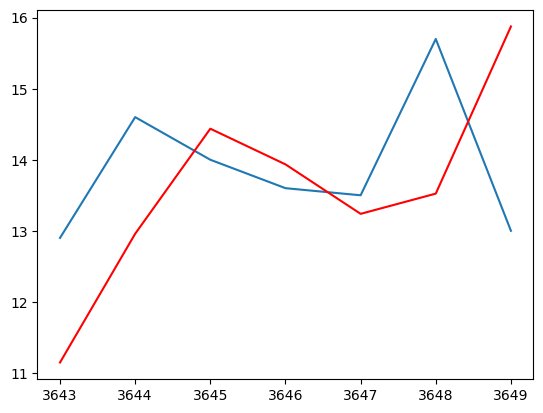

In [760]:
pyplot.plot(test_y)
pyplot.plot(predictions, color='red')

## ARIMA Model

In [ ]:
#step1-use difrencing remove trend 
#step 2-remove AR do forcasting
#step 3-use MA to upadte residual
#add trend and seasonality to forcast

In [763]:
df = pd.read_csv('shampoo.csv', header=0, parse_dates=[0])

In [764]:
df.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


In [765]:
df.tail()

,Month,Sales
31,3-08,407.6
32,3-09,682.0
33,3-10,475.3
34,3-11,581.3
35,3-12,646.9


<AxesSubplot:>

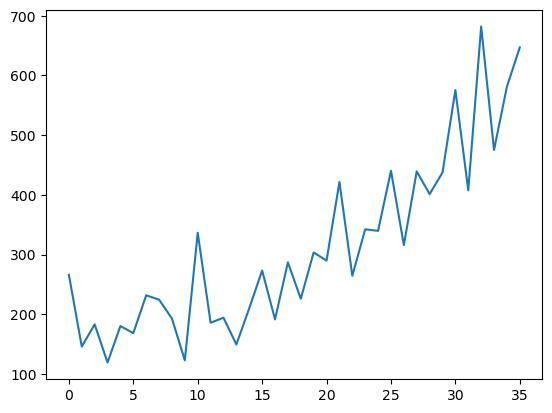

In [766]:
df['Sales'].plot()

Trend is Polynomial.  
D =2

### Autocorrelation Plot

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

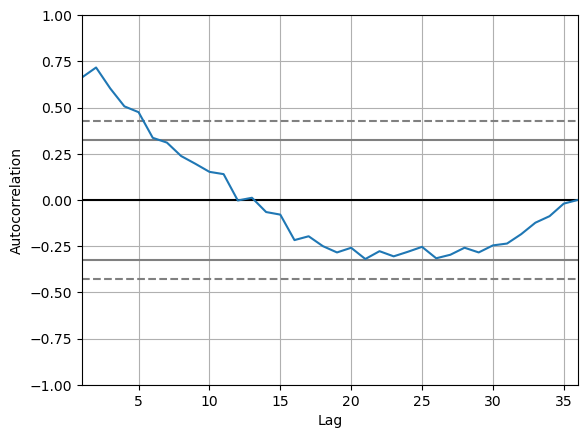

In [767]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Sales'])

 q = 5 

### Partial Autocorrelation Graph

In [768]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf

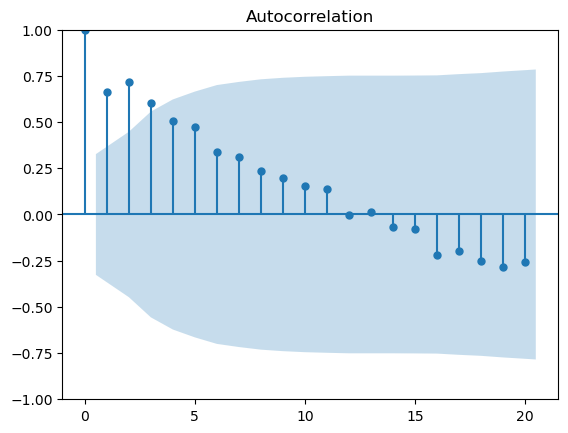

In [769]:
plot_acf(df['Sales'], lags=20);

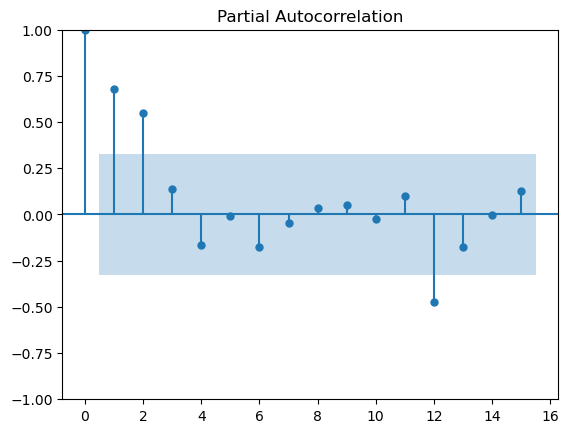

In [770]:
plot_pacf(df['Sales'], lags=15);

p = 2

In [789]:
from statsmodels.tsa.arima.model import ARIMA

In [790]:
model = ARIMA(df['Sales'], order=(1,2,2)) #p,d,q

In [791]:
model_fit = model.fit()

In [792]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(1, 2, 2)   Log Likelihood                -191.989
Date:                Mon, 06 Feb 2023   AIC                            391.979
Time:                        13:00:31   BIC                            398.084
Sample:                             0   HQIC                           394.061
                                 - 36                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4163      0.235     -1.774      0.076      -0.876       0.044
ma.L1         -1.9263     12.026     -0.160      0.873     -25.496      21.643
ma.L2          0.9985     12.458      0.080      0.936     -23.419      25.416
sigma2      3535.0802   4.35e+04      0.081      0.935   -8.18e+04    8.89e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):                 0.53
Prob(Q):                              0.73   Prob(JB):                         0.77
Heteroskedasticity (H):               1.04   Skew:                             0.25
Prob(H) (two-sided):                  0.95   Kurtosis:                         2.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Auto ARIMA

In [678]:
# #pip install pmdarima
# from pmdarima import auto_arima
# # Ignore harmless warnings
# import warnings
# warnings.filterwarnings("ignore")

In [679]:
# stepwise_fit = auto_arima(df['Sales'], 
#                           suppress_warnings=True)           

# stepwise_fit.summary()
     

In [786]:
# import itertools
# i = j = k=range(0, 4)
# ijk = itertools.product(i,j,k)
# for parameters in ijk:
#     try:
#         mod = ARIMA(df['Sales'],order=parameters)
#         results = mod.fit()
#         print('ARIMA{} - AIC:{}'.format(parameters, results.aic))
#     except:
#         continue

ARIMA(0, 0, 0) - AIC:465.40318697067914
ARIMA(0, 0, 1) - AIC:457.17853876205663
ARIMA(0, 0, 2) - AIC:444.7060176408192
ARIMA(0, 0, 3) - AIC:442.3953705836196
ARIMA(0, 1, 0) - AIC:429.2287465200137
ARIMA(0, 1, 1) - AIC:413.12523424193904
ARIMA(0, 1, 2) - AIC:399.4609190071207
ARIMA(0, 1, 3) - AIC:401.2686396839599
ARIMA(0, 2, 0) - AIC:459.18288818436736
ARIMA(0, 2, 1) - AIC:423.1009780137646
ARIMA(0, 2, 2) - AIC:396.0012079832066
ARIMA(0, 2, 3) - AIC:393.7646308930941
ARIMA(0, 3, 0) - AIC:489.2788625665327
ARIMA(0, 3, 1) - AIC:451.7874402663672
ARIMA(0, 3, 2) - AIC:419.12167624797877
ARIMA(0, 3, 3) - AIC:394.661575786661
ARIMA(1, 0, 0) - AIC:442.15716065598883
ARIMA(1, 0, 1) - AIC:430.1084138887032
ARIMA(1, 0, 2) - AIC:416.08877631047847
ARIMA(1, 0, 3) - AIC:417.994124894016
ARIMA(1, 1, 0) - AIC:406.5749246033786
ARIMA(1, 1, 1) - AIC:406.78234486916705
ARIMA(1, 1, 2) - AIC:401.26292251695156
ARIMA(1, 1, 3) - AIC:402.6579641413673
ARIMA(1, 2, 0) - AIC:421.9349927283625
ARIMA(1, 2, 1) - A

In [819]:
# # plt.plot(df['Sales'])
# # model_fit.predict(start=1,end=35).plot()
# # plt.plot(output)
# plt.figure(figsize=(16,8))
# plt.plot(df['Sales'], label='Train')
# plt.plot(model_fit.predict(start=0,end=35), label='Test',color='green')
# plt.plot(output, label='ARMIA_FORCAST',color = 'red')
# plt.legend()
# plt.show()

In [820]:
residuals = model_fit.resid

<AxesSubplot:>

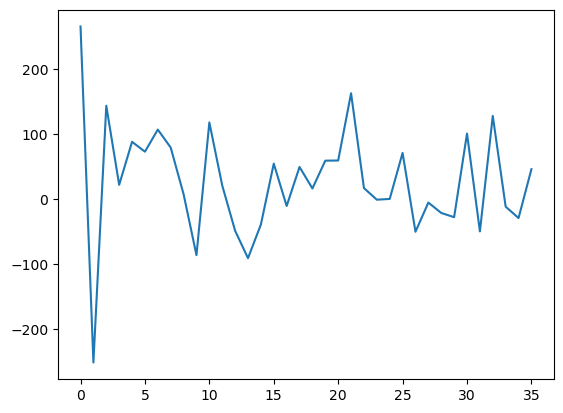

In [821]:
residuals.plot()

In [822]:
residuals.describe()

count     36.000000
mean      26.985941
std       88.625370
min     -251.565775
25%      -22.880987
50%       19.052546
75%       74.717388
max      266.000000
dtype: float64

### Variations
* **ARIMA** - <br />
    model = ARIMA(df['Sales'], order=(q,d,p)) <br />
* **Autoregression** - <br />
    model = ARIMA(df['Sales'], order=(p,d,0)) <br />
* **Moving Avaerage Model** - <br />
    model = ARIMA(df['Sales'], order=(0,d,q)) <br />

In [796]:
output = model_fit.forecast(6)

In [797]:
output

36    615.378631
37    667.906735
38    685.446261
39    717.551026
40    743.592492
41    772.158021
Name: predicted_mean, dtype: float64

In [798]:
import matplotlib.pyplot as plt


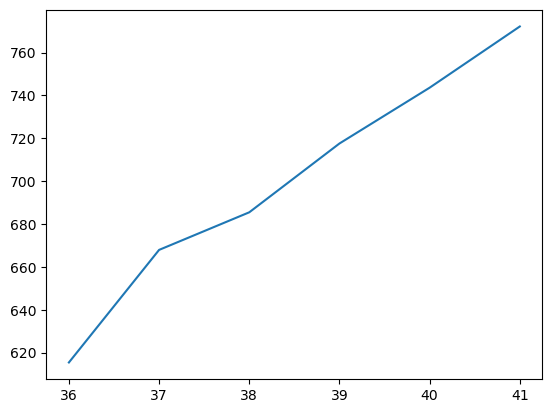

In [799]:
plt.plot(output)

In [806]:
predict

36    615.378631
37    667.906735
38    685.446261
39    717.551026
40    743.592492
41    772.158021
42    799.672820
Name: predicted_mean, dtype: float64

In [811]:
test.values

array([ 2.9,  1.7, -0.6, -0.4, -0.1,  2.2, -2.7])

In [807]:
model_fit.forecast()

36    615.378631
dtype: float64

## SARIMA or Seasonal ARIMA 

	
SARIMA(p,d,q)(P,D,Q)m

* p: Trend autoregression order.
* d: Trend difference order.
* q: Trend moving average order.

**Seasonal Elements** -   
There are four seasonal elements that are not part of ARIMA that must be configured; they are:  

* P: Seasonal autoregressive order.
* D: Seasonal difference order.
* Q: Seasonal moving average order.
* m: The number of time steps for a single seasonal period.

In [440]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [441]:
df = pd.read_csv('us-airlines-monthly-aircraft-miles-flown.csv', header=0 , parse_dates=[0])

In [442]:
df.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


In [443]:
df.tail()

,Month,MilesMM
91,1970-08-01,14057
92,1970-09-01,16234
93,1970-10-01,12389
94,1970-11-01,11595
95,1970-12-01,12772


In [444]:
df.index = df['Month'] 

In [446]:
from statsmodels.tsa.seasonal import seasonal_decompose

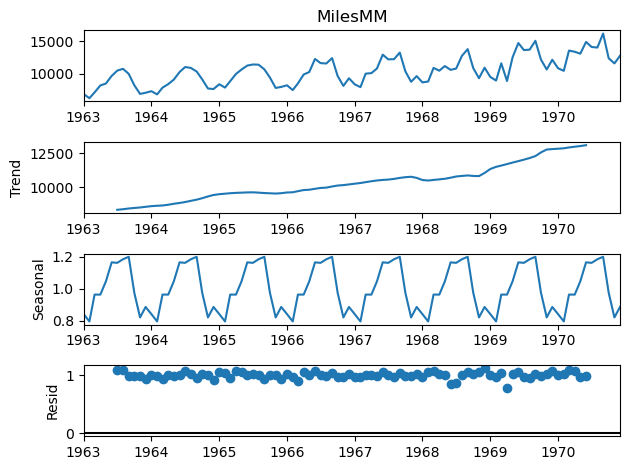

In [449]:
result_a = seasonal_decompose(df['MilesMM'], model='multiplicative')
result_a.plot();

In [450]:
model = SARIMAX(df['MilesMM'], order=(5,1,3), seasonal_order=(1,1,1,12))

C:\Users\Barath Murugan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Barath Murugan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [451]:
model_fit = model.fit()

C:\Users\Barath Murugan\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Barath Murugan\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Barath Murugan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [452]:
residuals = model_fit.resid

<AxesSubplot:xlabel='Month'>

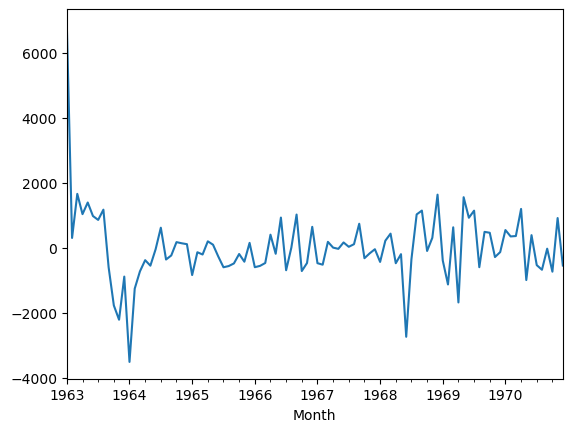

In [453]:
residuals.plot()

In [454]:
output = model_fit.forecast()

In [455]:
output

1971-01-01    11475.258159
Freq: MS, dtype: float64

In [456]:
model_fit.forecast(12)

1971-01-01    11475.258159
1971-02-01    11153.136770
1971-03-01    13668.248625
1971-04-01    12646.020105
1971-05-01    14339.038844
1971-06-01    15785.867681
1971-07-01    14978.381362
1971-08-01    15361.632180
1971-09-01    16962.126178
1971-10-01    13682.097037
1971-11-01    12426.647125
1971-12-01    13729.259736
Freq: MS, Name: predicted_mean, dtype: float64

In [457]:
yhat = model_fit.predict()

In [458]:
yhat.head()

1963-01-01       0.000000
1963-02-01    5871.941744
1963-03-01    5421.604073
1963-04-01    7123.709452
1963-05-01    7065.947562
Freq: MS, Name: predicted_mean, dtype: float64

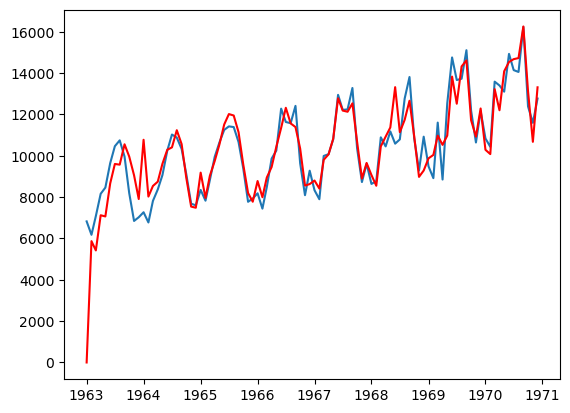

In [459]:
pyplot.plot(df['MilesMM'])
pyplot.plot(yhat, color='red')